# Setting the stage for our dataset

In [1]:

#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
 
raw_df = pd.read_csv("C:/Users/91883/Downloads/data_cardiovascular_risk.csv")
raw_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [4]:
df = raw_df.copy()

# We don't need the education and id columns for analysis and models as they are not relevant so we will remove them.

In [5]:

df.drop(columns=['education','id'],inplace = True)

In [6]:

df.shape

(3390, 15)

In [7]:

df.describe()

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,49.542183,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [8]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   sex              3390 non-null   object 
 2   is_smoking       3390 non-null   object 
 3   cigsPerDay       3368 non-null   float64
 4   BPMeds           3346 non-null   float64
 5   prevalentStroke  3390 non-null   int64  
 6   prevalentHyp     3390 non-null   int64  
 7   diabetes         3390 non-null   int64  
 8   totChol          3352 non-null   float64
 9   sysBP            3390 non-null   float64
 10  diaBP            3390 non-null   float64
 11  BMI              3376 non-null   float64
 12  heartRate        3389 non-null   float64
 13  glucose          3086 non-null   float64
 14  TenYearCHD       3390 non-null   int64  
dtypes: float64(8), int64(5), object(2)
memory usage: 397.4+ KB


In [9]:

#dealing with the null values
def missing_values(df):

  #total of missing values for each column
  total_missing_value = df.isna().sum()

  #percentage of missing values 
  percent_missing_value = total_missing_value*100/len(df)

  #making a table of the above results
  table = pd.concat([total_missing_value,percent_missing_value],axis = 1)

  #renaming the columns
  table.rename(columns = {0:'missing values',1:'percent of missing values'},inplace = True)

  #sorting the table in decreasing order by percentage of missing values
  missing_values_table = table.sort_values('percent of missing values',ascending = False).round(1)

  return missing_values_table

In [10]:

missing_values(df)

,missing values,percent of missing values
glucose,304,9.0
BPMeds,44,1.3
totChol,38,1.1
cigsPerDay,22,0.6
BMI,14,0.4
heartRate,1,0.0
age,0,0.0
sex,0,0.0
is_smoking,0,0.0
prevalentStroke,0,0.0


# Close to 12 percent null values are there so we will drop them as machine learning models do not support data with missing values.

In [11]:

df.dropna(axis=0, inplace=True)

In [12]:
#checking for numeric features
numeric_features = df.describe().columns
numeric_features

Index(['age', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose',
       'TenYearCHD'],
      dtype='object')

In [13]:

#checking for categorical features
categorical_features = df.describe(include=['object','category']).columns
categorical_features

Index(['sex', 'is_smoking'], dtype='object')

# Data preparation for Exploratory Data Analysis and Visualizations.

## Before we feed the data to our models. First we will try to interpret what the data is trying to convey by extracting necessary information from it using EDA and graphical visualisations.

In [14]:
df['TenYearCHD'].value_counts()

TenYearCHD
0    2547
1     457
Name: count, dtype: int64

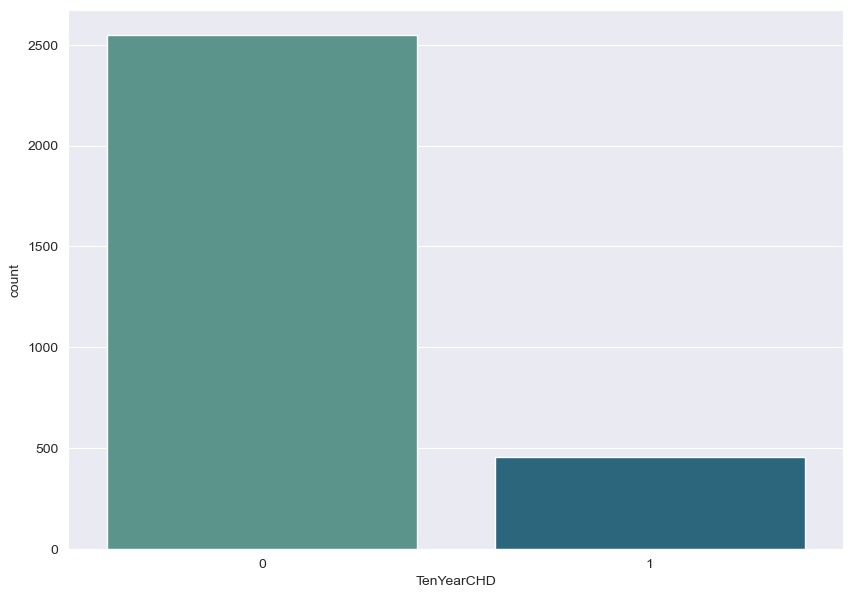

In [15]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.countplot(x='TenYearCHD',data=df,palette='crest')
plt.show()

## This is quite an imbalanced data as the number of people without the disease greatly outnumber the people who have the disease.

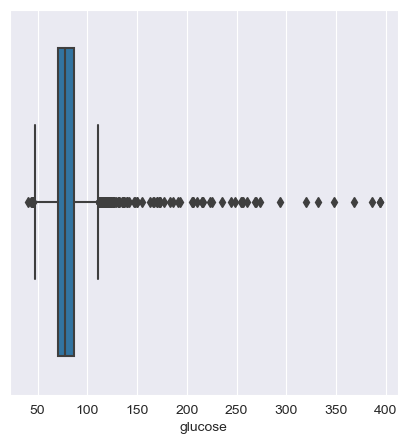

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
sns.set_style("darkgrid")
sns.boxplot(x=df['glucose'], orient='horizontal')
plt.show()

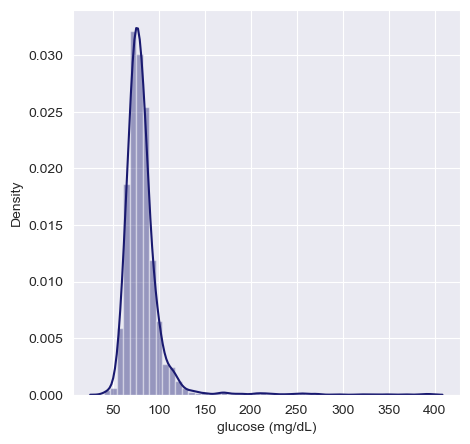

In [17]:

plt.figure(figsize=(5,5))
sns.set_style("darkgrid")
sns.distplot(df['glucose'],color="midnightblue")
plt.xlabel('glucose (mg/dL)')
plt.show()

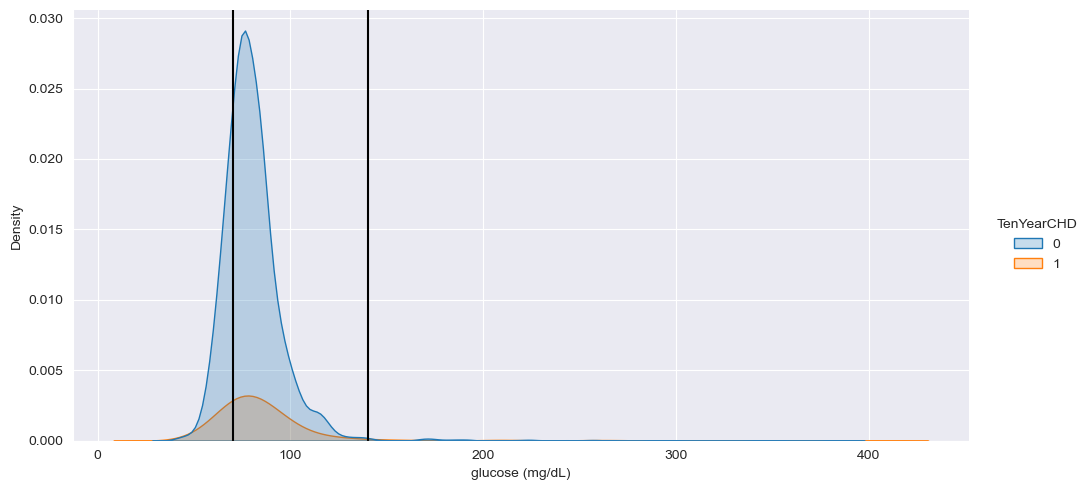

In [18]:
sns.displot(data=df, x='glucose', hue='TenYearCHD', kind='kde', fill=True, height=5, aspect=2)
plt.axvline(70, 0,1,color='black')
plt.axvline(140, 0,1,color='black')
plt.xlabel('glucose (mg/dL)')
plt.show()

### The normal glucose ranges from 70 mg/dL to 140 mg/dL given at what time of the day it was done whether it was before meal, after meal, during fasting or before bedtime.
It is clear from the distribution that there has been cases with glucose level as low as 20 mg/dL to 25 mg/dL and as high as 400 mg/dL to 440 mg/dL.
Also we can see that the glucose level is touching the high and the low value for both the cases whether the risk of coronary heart disease is present or not.

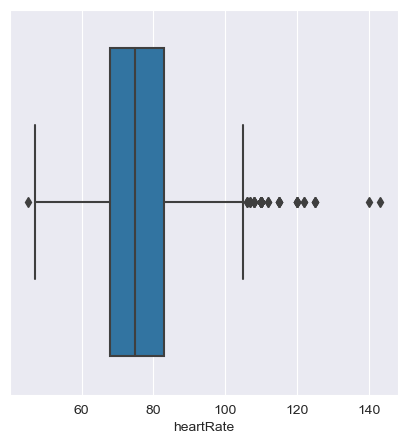

In [19]:
plt.figure(figsize=(5,5))
sns.set_style("darkgrid")
sns.boxplot(x=df['heartRate'], orient='horizontal')
plt.show()

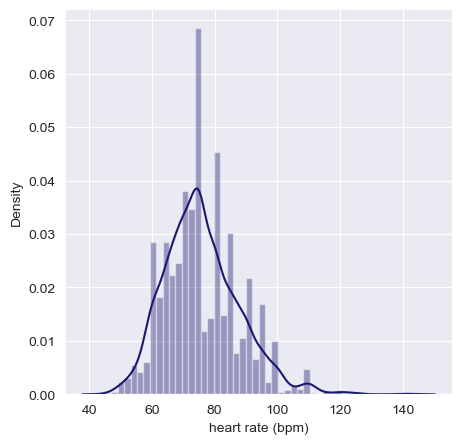

In [20]:
plt.figure(figsize=(5,5))
sns.set_style("darkgrid")
sns.distplot(df['heartRate'],color="midnightblue")
plt.xlabel('heart rate (bpm)')
plt.show()

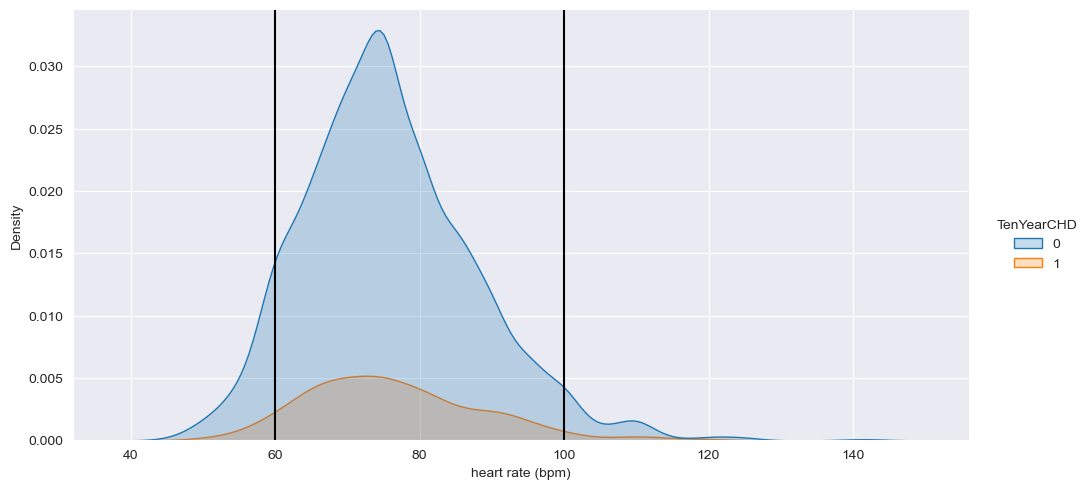

In [21]:
sns.displot(data=df, x='heartRate', hue='TenYearCHD', kind='kde', fill=True, height=5, aspect=2)
plt.axvline(60, 0,1,color='black')
plt.axvline(100, 0,1,color='black')
plt.xlabel('heart rate (bpm)')
plt.show()

## Resting healthy heart rate for a normal human body is between 60 bpm to 100 bpm but in our dataset it ranges between 38 bpm to 155 bpm.
In patients with known coronary heart disease, elevated heart rate reduces diastolic filling time and increases cardiac workload, resulting in supply demand mismatch with consequent ischemia(condition in which the blood flow (and thus oxygen) is restricted or reduced in a part of the body) and angina(chest pain caused by reduced blood flow to the heart).
Surprisingly in our dataset no conclusion can be made to distinguish between the people who are at risk of CHD or not at risk as for both categories of people the heart rate varies similarly.

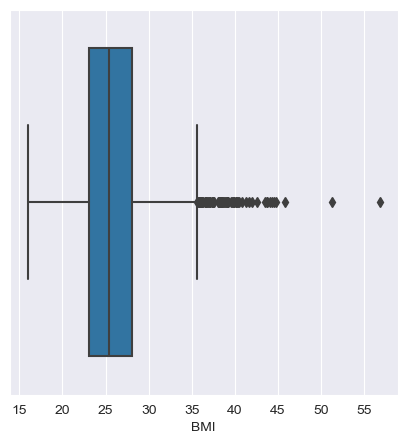

In [22]:
plt.figure(figsize=(5,5))
sns.set_style("darkgrid")
sns.boxplot(x=df['BMI'], orient='horizontal')
plt.show()

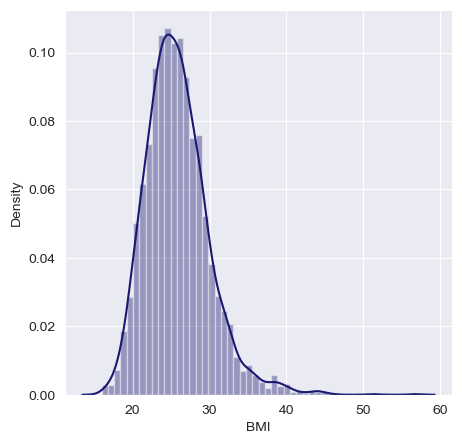

In [23]:
plt.figure(figsize=(5,5))
sns.set_style("darkgrid")
sns.distplot(df['BMI'],color="midnightblue")
plt.show()

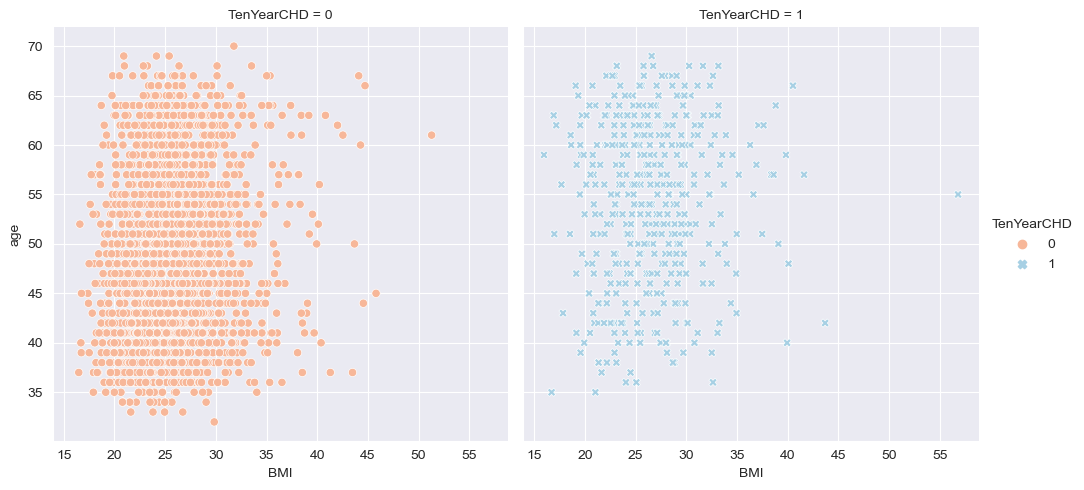

In [24]:
sns.set_style("darkgrid")
sns.relplot(data=df, x="BMI", y="age",hue="TenYearCHD",col='TenYearCHD',style='TenYearCHD',kind="scatter",palette='RdBu')
plt.show()

### BMI in our dataset ranges in between 15 to almost 60.
People with BMI in the range 18.5 to 24.9 are considered healthy, 25.0 to 29.9 as overweight and after 30.0 are classified as obese.
People with risk of coronary heart disease are spread quite evenly.
So there must be other factors other than BMI that are contributing to the potential risk of coronary heart disease.We have cases where people are in the category of obese but still not at risk of CHD and a lot of people in the category of healthy but still at the risk of CHD.

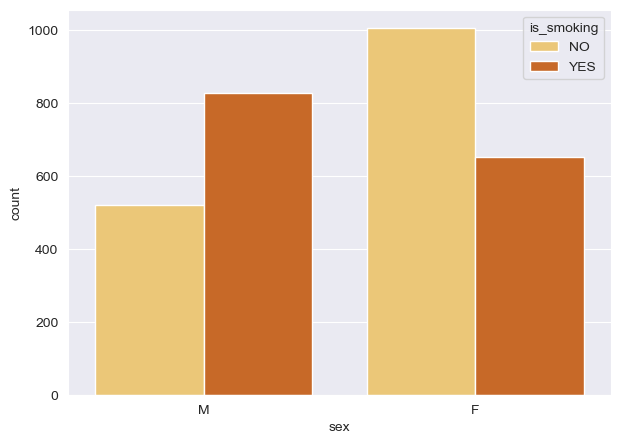

In [25]:
plt.figure(figsize=(7,5))
sns.set_style("darkgrid")
sns.countplot(x='sex',data=df,hue='is_smoking',palette='YlOrBr')
plt.show()

## Does smoking add to the risk of CHD?
It is an unhealthy habit for starters and comparatively CHD is quite common in people with unhealthy food habits, drug abuse, tobacco use and others.
Males who smoke are at greater risk of CHD compared to females.
Moreover, males who smoke are at greater risk of CHD in comparison to non smokers.

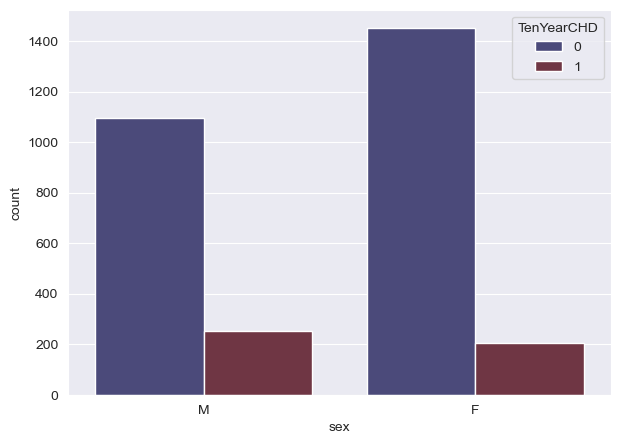

In [26]:
plt.figure(figsize=(7,5))
sns.set_style("darkgrid")
sns.countplot(x='sex',data=df,hue='TenYearCHD',palette='icefire')
plt.show()

### Our dataset has close to 1250 males and 1650 females.And the proportion of TenYearCHD = 1 is more inclined towards males even though the females are in majority in our dataset.

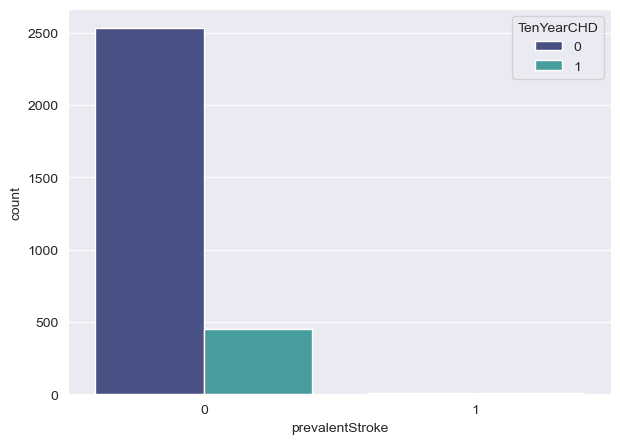

In [27]:
plt.figure(figsize=(7,5))
sns.set_style("darkgrid")
sns.countplot(x='prevalentStroke',hue='TenYearCHD',data=df,palette='mako')
plt.show()

## Cases with positive prevalant stroke are very negligible in our dataset. It would be immature to make any hard assumptions from this variable.
People who didn't have prevalant stroke have cases where the risk of CHD is positive. people with both prevalant stroke and TenYearCHD as 1 are very few in number.

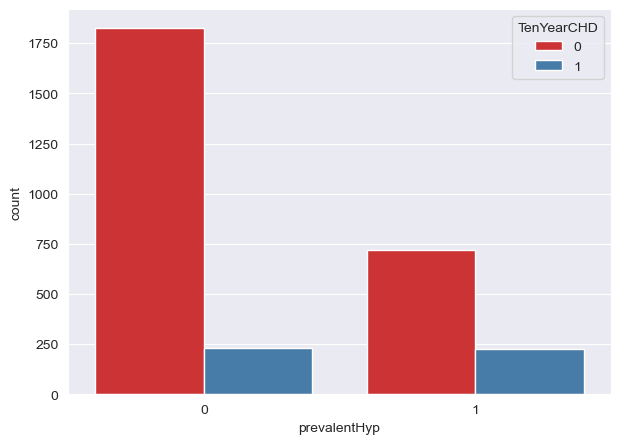

In [28]:
plt.figure(figsize=(7,5))
sns.set_style("darkgrid")
sns.countplot(x='prevalentHyp',hue='TenYearCHD',data=df,palette='Set1')
plt.show()

## The excess strain and resulting damage from hypertension causes the coronary arteries serving the heart to slowly become narrowed from a buildup of fat, cholesterol and other substances that together are called plaque. This leads to narrowed artery which limits or blocks the flow of blood to the heart muscle, which means it might not get enough oxygen.
We can see that most of the people who have hypertension are at risk of coronary heart disease.Hypertension is one of the contributing factors to the risk of CHD.
There are cases where hypertension is not there but the risk of CHD is still present

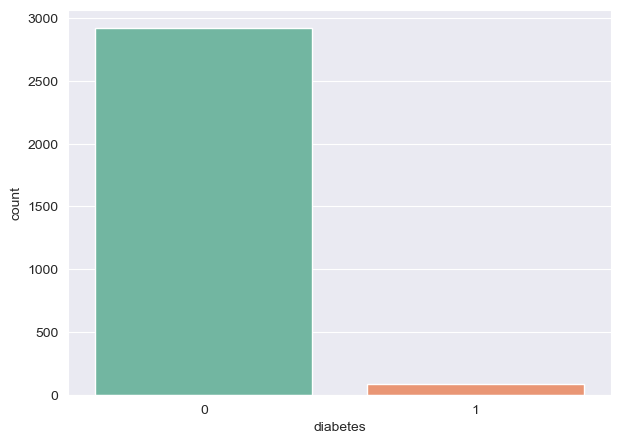

In [29]:
plt.figure(figsize=(7,5))
sns.set_style("darkgrid")
sns.countplot(x='diabetes',data=df,palette='Set2')
plt.show()

# Most of the people in our dataset are not diabetic and very few are in number who have diabetes.

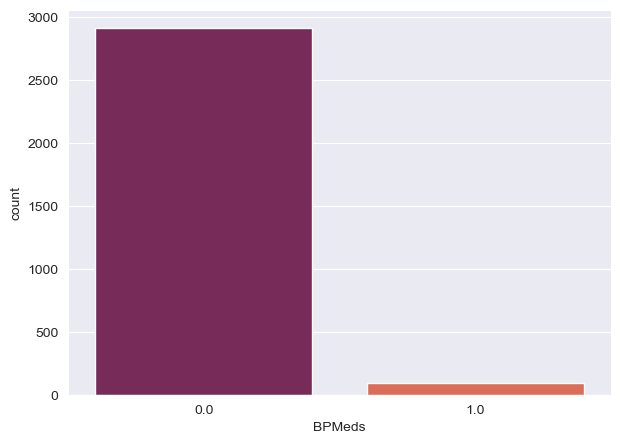

In [30]:
plt.figure(figsize=(7,5))
sns.set_style("darkgrid")
sns.countplot(x='BPMeds',data=df,palette='rocket')
plt.show()

# Quite clearly visible that very less number of people are on BP medication.

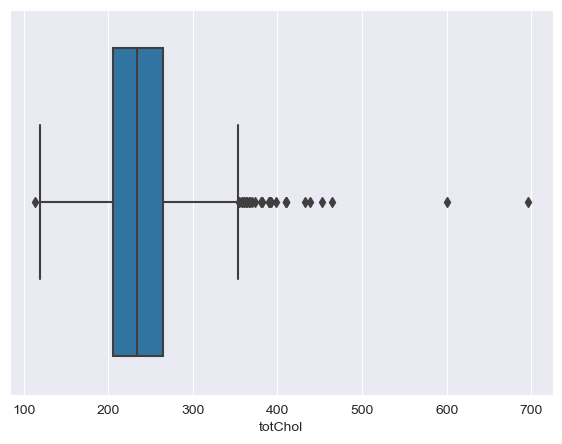

In [31]:
plt.figure(figsize=(7,5))
sns.set_style("darkgrid")
sns.boxplot(x=df['totChol'], orient='horizontal')
plt.show()

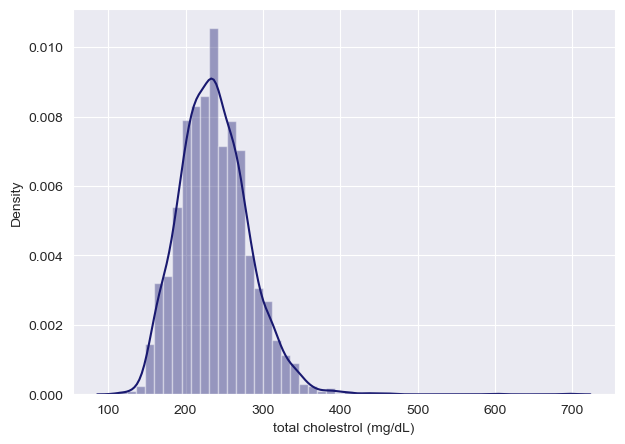

In [32]:
plt.figure(figsize=(7,5))
sns.set_style("darkgrid")
sns.distplot(df['totChol'],color="midnightblue")
plt.xlabel('total cholestrol (mg/dL)')
plt.show()

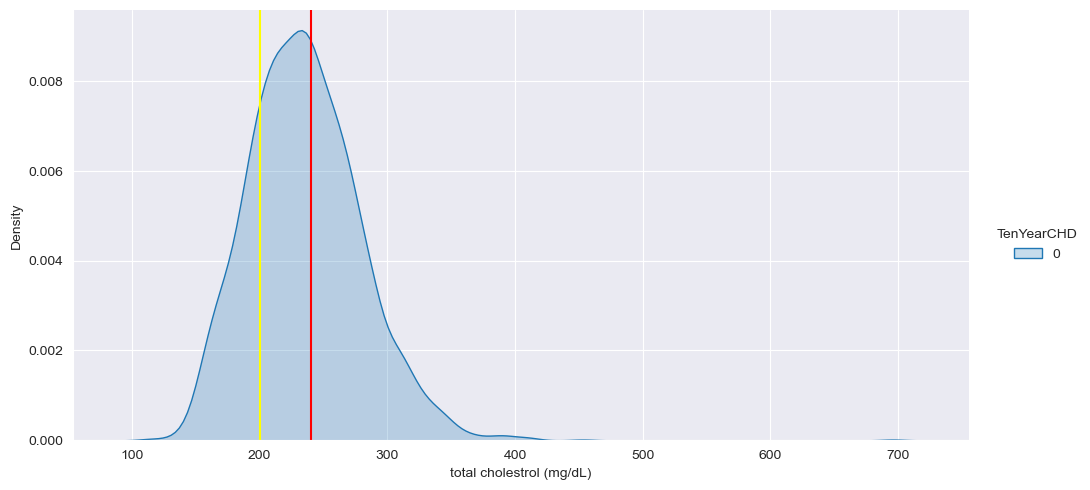

In [33]:
zero_tc = df[df['TenYearCHD']==0]
sns.displot(data=zero_tc, x='totChol', hue='TenYearCHD', kind='kde', fill=True, height=5, aspect=2)
plt.axvline(200, 0,1,color='yellow')
plt.axvline(240, 0,1,color='red')
plt.xlabel('total cholestrol (mg/dL)')
plt.show()

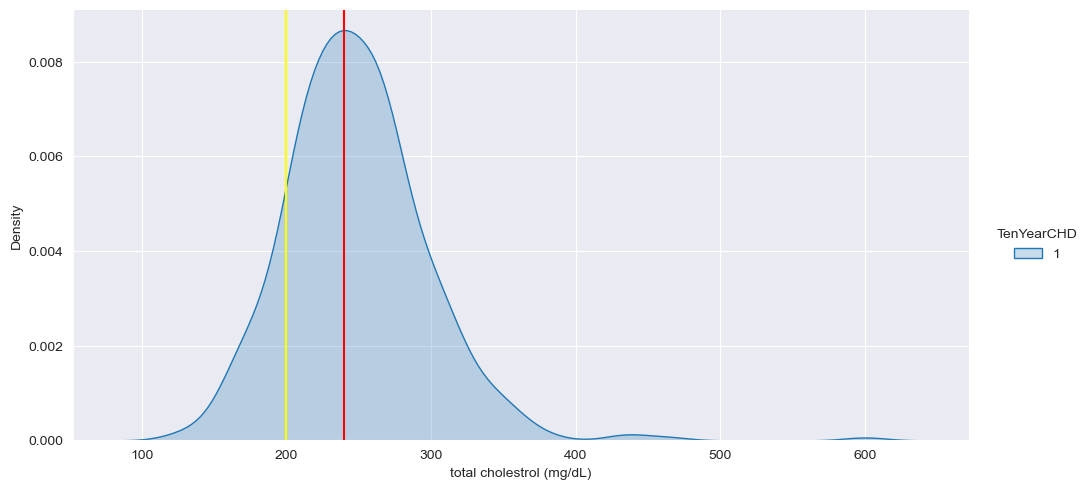

In [34]:
one_tc = df[df['TenYearCHD']==1]
sns.displot(data=one_tc, x='totChol', hue='TenYearCHD', kind='kde', fill=True, height=5, aspect=2)
plt.axvline(200, 0,1,color='yellow')
plt.axvline(240, 0,1,color='red')
plt.xlabel('total cholestrol (mg/dL)')
plt.show()

## Total cholesterol includes low-density lipoprotein (bad) cholesterol and high-density lipoprotein (good) cholesterol.
Less than 200 mg/dL is desirable level, 200 - 239 mg/dL is borderline high level and 240 mg/dL and above comes in the category of high level.
In our dataset most of the people are either in the borderline area(between yellow and red vertical line) or in the high level(beyond red line).
People who are at risk of CHD have total cholesterol ranging in between less than 100 mg/dL to 700 mg/dL almost.

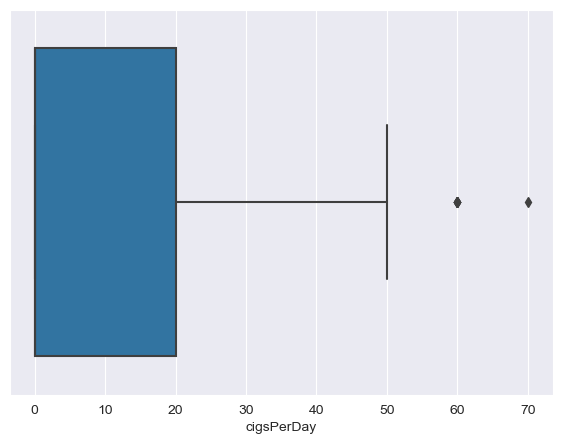

In [35]:
plt.figure(figsize=(7,5))
sns.set_style("darkgrid")
sns.boxplot(x=df['cigsPerDay'], orient='horizontal')
plt.show()

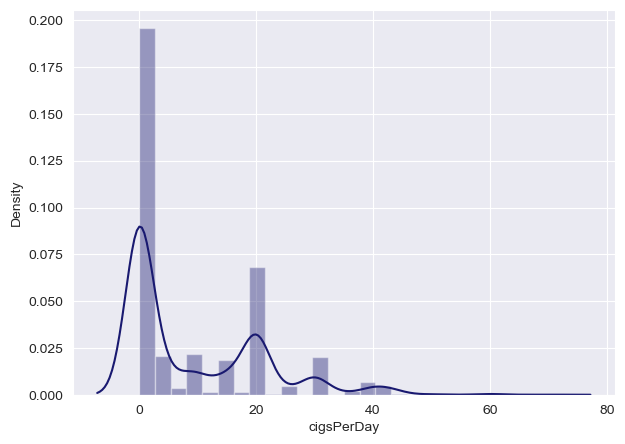

In [36]:
plt.figure(figsize=(7,5))
sns.set_style("darkgrid")
sns.distplot(df['cigsPerDay'],color="midnightblue")
plt.show()

## Most of the people in our dataset do not smoke and then after that there are people who smoke 20 cigarettes a day.
The graph ranges from 0 cigarettes to 70 cigarettes a day which is very high quantity.

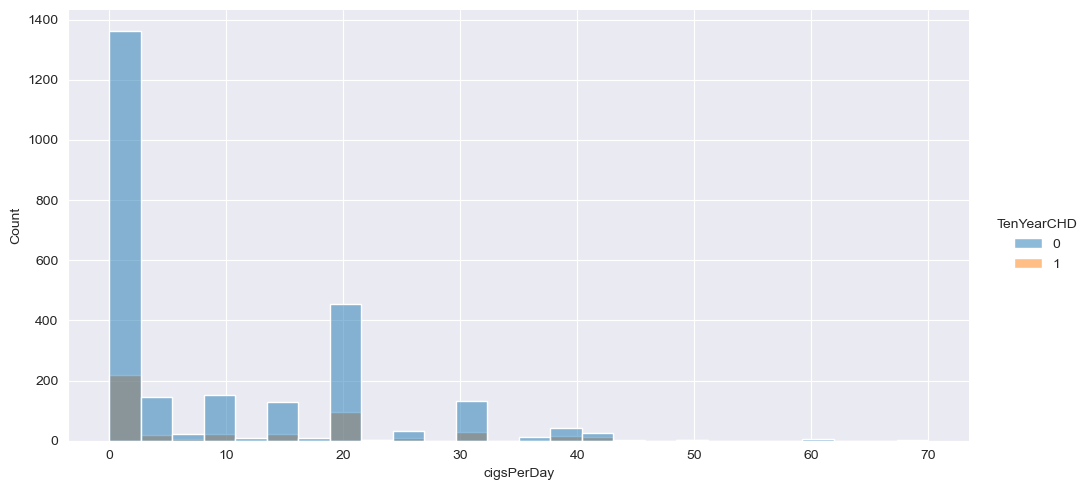

In [37]:
sns.displot(data=df, x='cigsPerDay', hue='TenYearCHD', fill=True, height=5, aspect=2)
plt.show()

## People who do not smoke are also at risk of coronary heart disease and people who smoke are also at risk for the same.Enough evidence is not there to assume that smokers are at more risk of CHD.
Although if observed in a cummulative manner then we can say that smokers in general are at greater risk of coronary heart disease compared to non smokers.

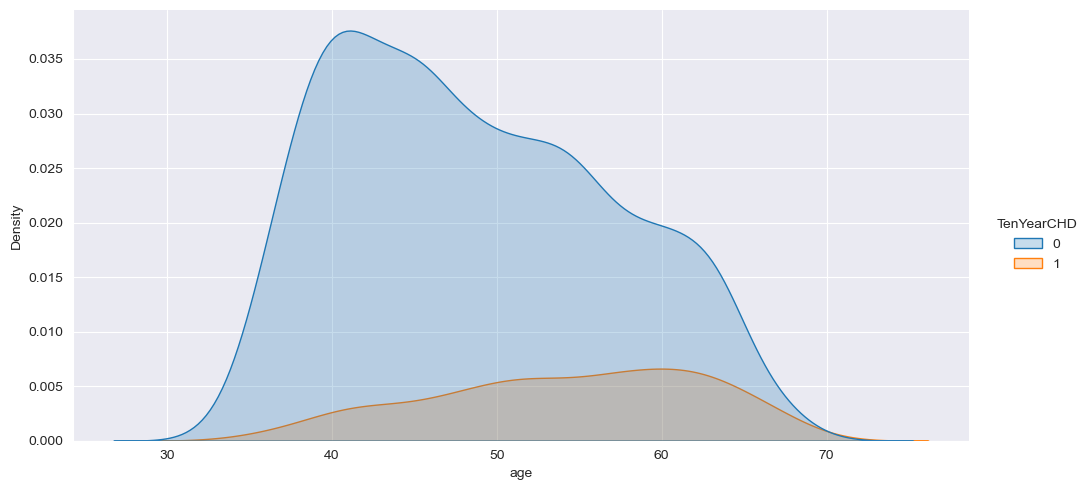

In [38]:
sns.displot(data=df, x='age', hue='TenYearCHD', kind='kde', fill=True, height=5, aspect=2)
plt.show()

## We have people in the age group from 30 years old to 80 years old.
Our dataset has more number of people in the age group between 38 years to 50 years old.
But the people who are at more risk of CHD are in the age group 50 years to 70 years old

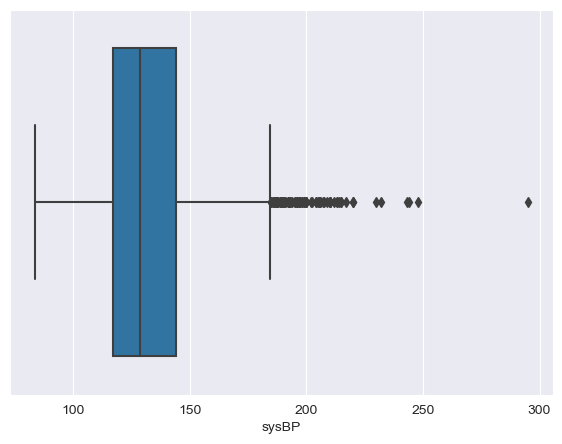

In [39]:
plt.figure(figsize=(7,5))
sns.set_style("darkgrid")
sns.boxplot(x=df['sysBP'], orient='horizontal')
plt.show()

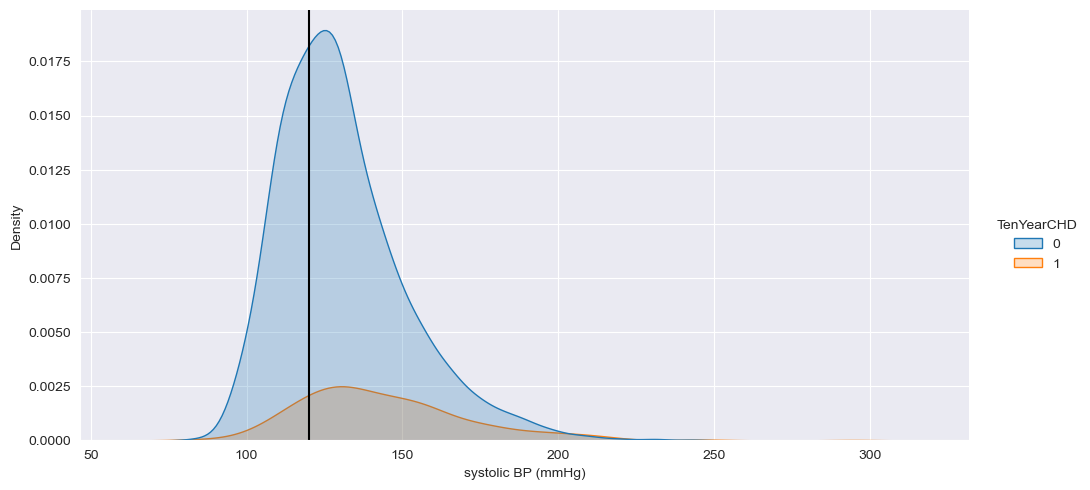

In [40]:
sns.displot(data=df, x='sysBP', hue='TenYearCHD', kind='kde', fill=True, height=5, aspect=2)
plt.axvline(120, 0,1,color='black')
plt.xlabel('systolic BP (mmHg)')
plt.show()

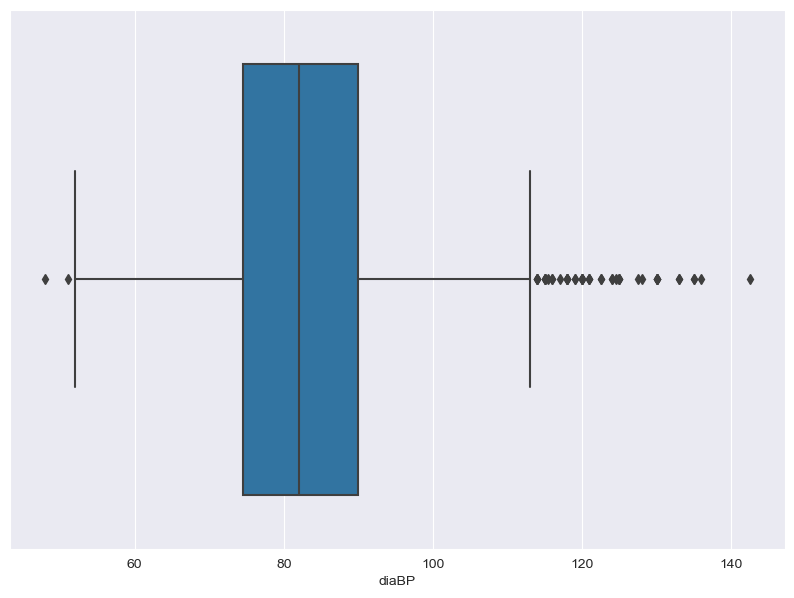

In [41]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.boxplot(x=df['diaBP'], orient='horizontal')
plt.show()

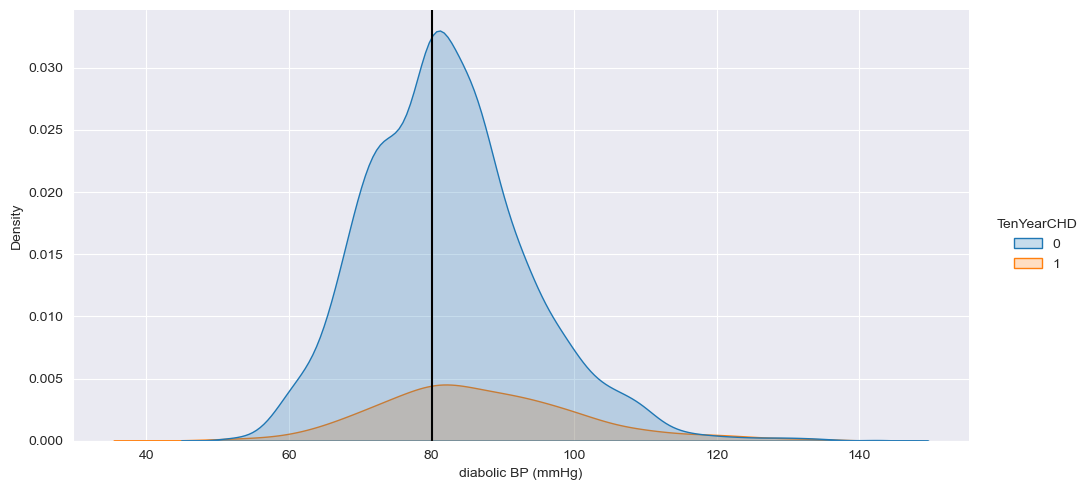

In [42]:
sns.displot(data=df, x='diaBP', hue='TenYearCHD', kind='kde', fill=True, height=5, aspect=2)
plt.axvline(80, 0,1,color='black')
plt.xlabel('diabolic BP (mmHg)')
plt.show()

# When it comes to systolic and diabloic blood pressure measurements.
SysBP less than 120 is considered normal and DiaBP less than 80 is considered normal.
In Systolic BP we have cases where the readings are almost 380 mmHg which is very high number. It is also visible that people that are more at risk of CHD have readings reaching upto 380 mmHg.
Although there is no evidence to assume whether BP readings(systolic and diablic)are contributing to the risk of CHD or not.
Now that we are clear with the Exploratory Data Analysis we will head to fit different Machine Learning algorithms to predict the TenYearCHD.

## We will run 7 models on the given dataset:
1. Logistic Regression.
2. K Nearest Neighbour.
3. Decision Tree.
4. Random Forest.
5. XGBoost.
6. Support Vector Machine.

In [43]:
#dummify the categorical variables
df = pd.get_dummies(df,columns=['sex','is_smoking'])

In [44]:
df.head()
     

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_F,sex_M,is_smoking_NO,is_smoking_YES
1,36,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,False,True,True,False
2,46,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,True,False,False,True
3,50,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,False,True,False,True
4,64,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,True,False,False,True
5,61,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1,True,False,True,False


In [45]:

df.columns

Index(['age', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose',
       'TenYearCHD', 'sex_F', 'sex_M', 'is_smoking_NO', 'is_smoking_YES'],
      dtype='object')

In [46]:

features = ['age', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose',
        'sex_F', 'sex_M', 'is_smoking_NO', 'is_smoking_YES']

In [47]:

df.shape

(3004, 17)

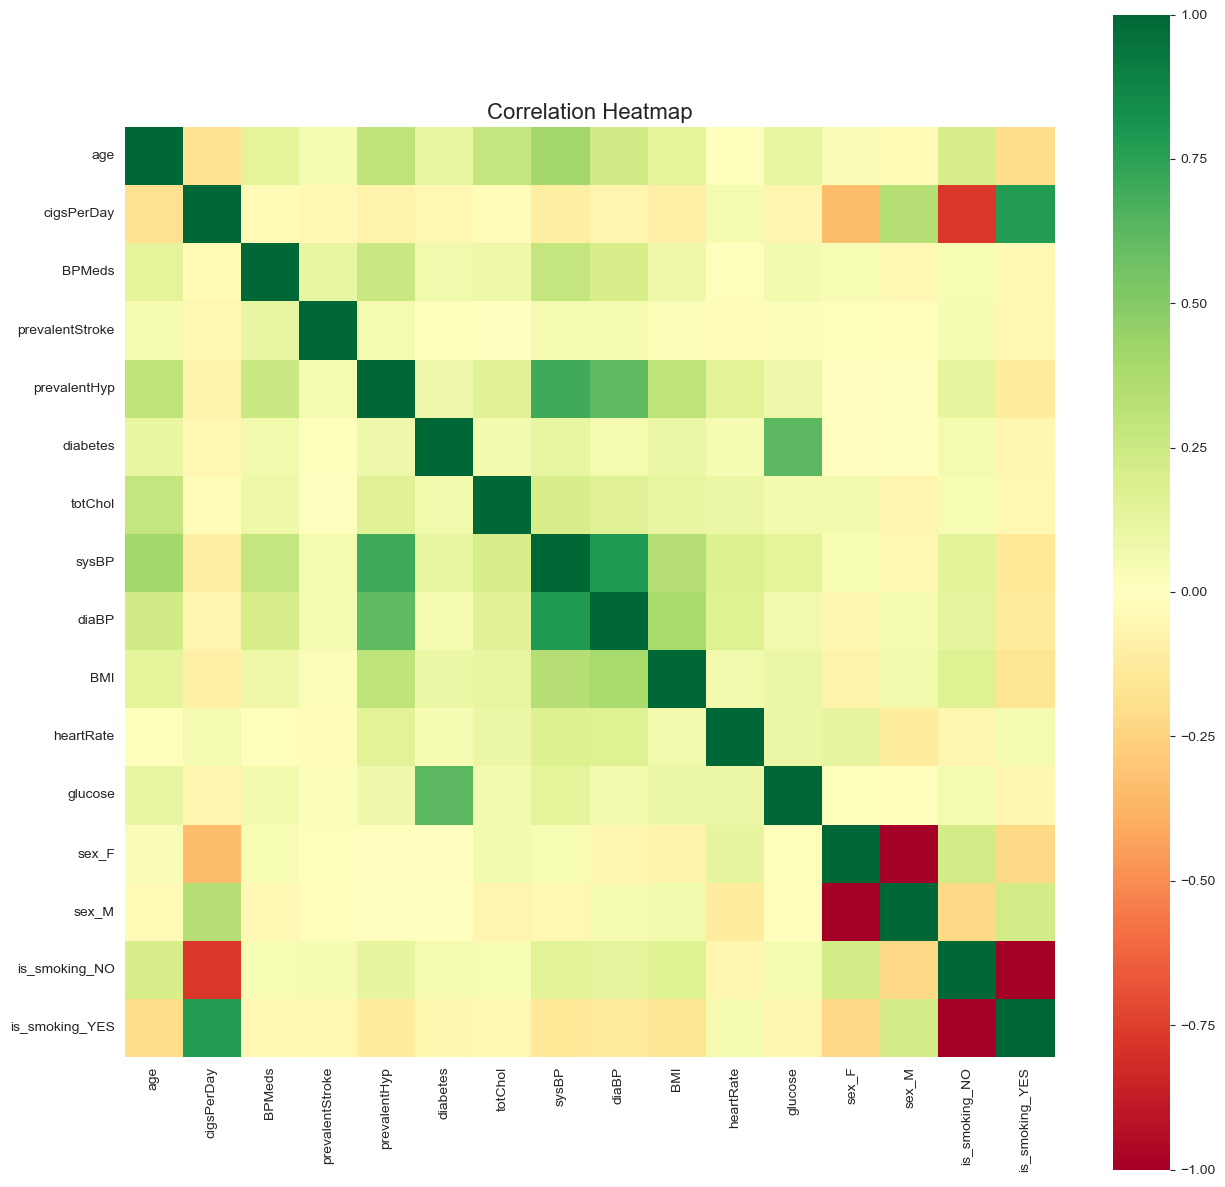

In [48]:
#correlation heatmap
df_corr = df.drop(labels='TenYearCHD',axis=1)
correlation = df_corr.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, cmap='RdYlGn', vmin=-1, vmax=1, square=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# Since our data is quite imbalanced we will run SMOTE to balance it.

In [49]:

from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df[features], df['TenYearCHD'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 3004
Resampled dataset shape 5094


In [50]:
df_new = pd.concat([x_smote,y_smote], axis=1)

In [51]:

df_new.head()

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,sex_F,sex_M,is_smoking_NO,is_smoking_YES,TenYearCHD
0,36,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,False,True,True,False,0
1,46,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,True,False,False,True,0
2,50,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,False,True,False,True,1
3,64,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,True,False,False,True,0
4,61,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,True,False,True,False,1


In [52]:

df_new.shape

(5094, 17)

In [53]:
df_new['TenYearCHD'].value_counts()

TenYearCHD
0    2547
1    2547
Name: count, dtype: int64

In [54]:
X = df_new[features]
y = df_new.iloc[:,-1]

In [55]:

# split the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123,stratify=y)

In [56]:

from sklearn.preprocessing import StandardScaler

In [57]:
#standardize the variables before feeding to the algorithms
scaler = StandardScaler()

scaled_train_X = scaler.fit_transform(X_train)
X_train = pd.DataFrame(scaled_train_X)

scaled_test_X = scaler.transform(X_test)
X_test = pd.DataFrame(scaled_test_X)

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

# KNN

In [59]:

from sklearn.neighbors import KNeighborsClassifier


#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

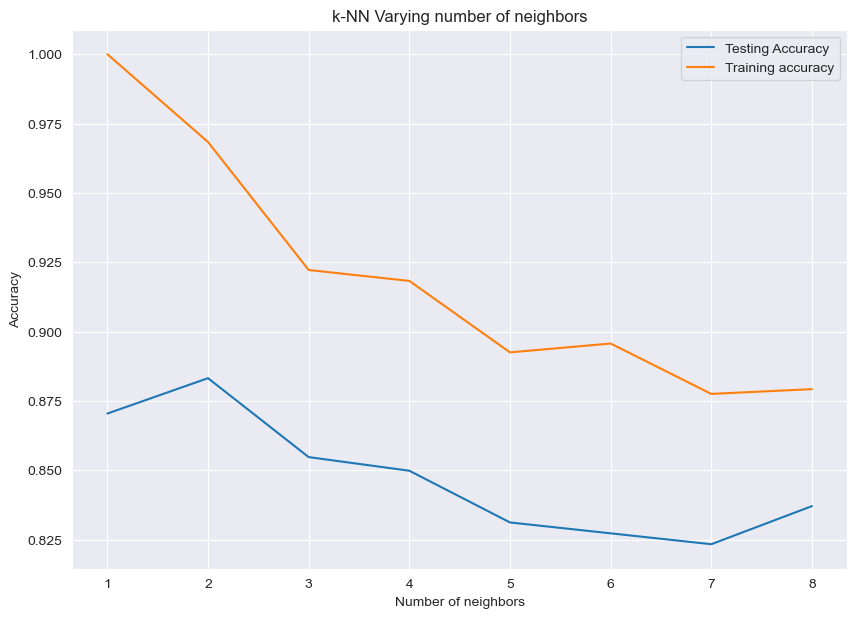

In [60]:

# Generate plot for different values of k vs accuracy
plt.figure(figsize=(10,7))
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [61]:

# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=1)

In [62]:

# Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [63]:

#Prediction on the test set
y_knn_pred = knn.predict(X_test)

In [64]:

#check accuracy
knn_acc = accuracy_score(y_test,y_knn_pred)
print(f"Using k-nearest neighbours we get an accuracy of {round(knn_acc*100,2)}%")

Using k-nearest neighbours we get an accuracy of 87.05%


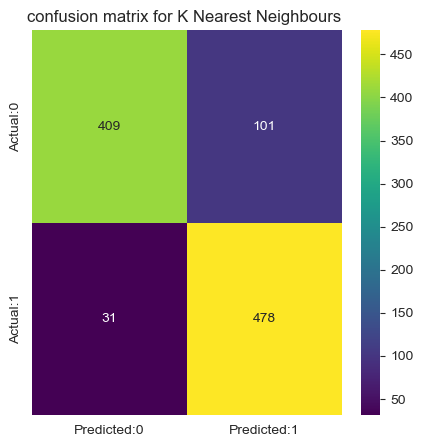

              precision    recall  f1-score   support

           0       0.93      0.80      0.86       510
           1       0.83      0.94      0.88       509

    accuracy                           0.87      1019
   macro avg       0.88      0.87      0.87      1019
weighted avg       0.88      0.87      0.87      1019



In [65]:
#plot the confusion matrix
conf_mat = confusion_matrix(y_test,y_knn_pred)
conf_matrix=pd.DataFrame(data=conf_mat,index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='viridis')
plt.title('confusion matrix for K Nearest Neighbours ')
plt.show()


#classification report
print(classification_report(y_test,y_knn_pred))

In [66]:

#check f1 score
knn_f1_score = f1_score(y_test, y_knn_pred)
print(f'The f1 score for K nearest neignbours is {round(knn_f1_score*100,2)}%')

The f1 score for K nearest neignbours is 87.87%


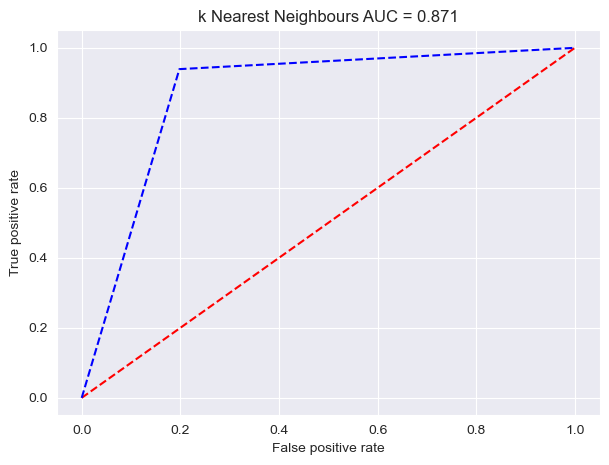

In [67]:
#predict probability of the target variable
probability = knn.predict_proba(X_test)

# keep probabilities for the positive outcome only
probability = probability[:, 1]

# calculate AUC
knn_auc = roc_auc_score(y_test, probability)

# calculate roc curve
fpr, tpr, thresh = roc_curve(y_test, probability)

# plot curve
sns.set_style('darkgrid')
plt.figure(figsize=(7,5))
plt.plot([0, 1], [0, 1], linestyle='--',color='red')
plt.plot(fpr, tpr,linestyle='--',color='blue')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"k Nearest Neighbours AUC = {round(knn_auc,3)}")
plt.show()

# RANDOM FOREST

In [68]:

#import library
from sklearn.ensemble import RandomForestClassifier


# Use gridsearch to search optimal parameters
params = {
    'bootstrap': [True],
    'max_depth': [15,18,20,25,30],
    'max_features': ['auto'],
    'min_samples_split': [2,4,6,8,10],
    'max_samples':[0.8],
    'n_estimators': [50,80,100]
}

rf_classifier = GridSearchCV(RandomForestClassifier(), param_grid=params, n_jobs=-1, error_score='raise')


In [69]:
rf_classifier = RandomForestClassifier()  # Creating RandomForestClassifier without GridSearchCV
rf_classifier.fit(X_train, y_train)  # Fitting the classifier
     

RandomForestClassifier()

In [70]:
rf_classifier = RandomForestClassifier(random_state=0,
                                       bootstrap=True,
                                       max_depth=18,
                                       max_features='sqrt',
                                       max_samples=0.8,
                                       min_samples_split=2,
                                       n_estimators=100)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=18, max_samples=0.8, random_state=0)

In [71]:
#predict on test set
y_rf_pred = rf_classifier.predict(X_test)

In [72]:

#check accuracy
rf_acc = accuracy_score(y_test,y_rf_pred)
print(f"Using Random forest we get an accuracy of {round(rf_acc*100,2)}%")

Using Random forest we get an accuracy of 89.99%


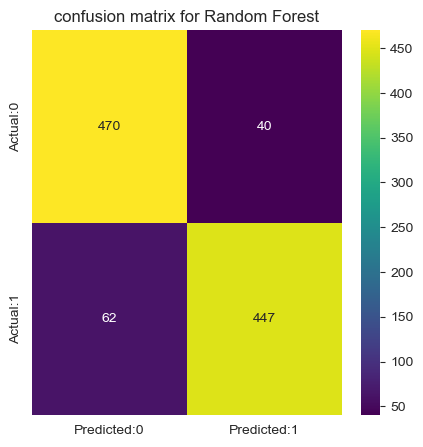

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       510
           1       0.92      0.88      0.90       509

    accuracy                           0.90      1019
   macro avg       0.90      0.90      0.90      1019
weighted avg       0.90      0.90      0.90      1019



In [113]:
conf_mat = confusion_matrix(y_test,y_rf_pred)
conf_matrix=pd.DataFrame(data=conf_mat,index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='viridis')
plt.title('confusion matrix for Random Forest')
plt.show()

#classification report
print(classification_report(y_test,y_rf_pred))

In [74]:

#check f1 score
rf_f1_score = f1_score(y_test, y_rf_pred)
print(f'The f1 score for random forest classifier is {round(rf_f1_score*100,2)}%')

The f1 score for random forest classifier is 89.76%


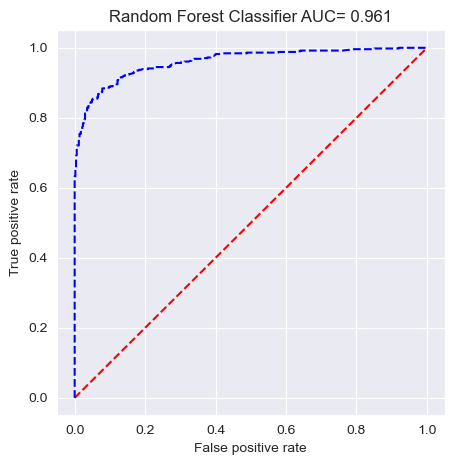

In [112]:
#predict probability of the target variable
probability = rf_classifier.predict_proba(X_test)

# keep probabilities for the positive outcome only
probability = probability[:, 1]

# calculate AUC
rf_auc = roc_auc_score(y_test, probability)

# calculate roc curve
fpr, tpr, thresh = roc_curve(y_test, probability)

# plot curve
sns.set_style('darkgrid')
plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], linestyle='--',color='red')
plt.plot(fpr, tpr,linestyle='--',color='blue')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"Random Forest Classifier AUC= {round(rf_auc,3)}")
plt.show()

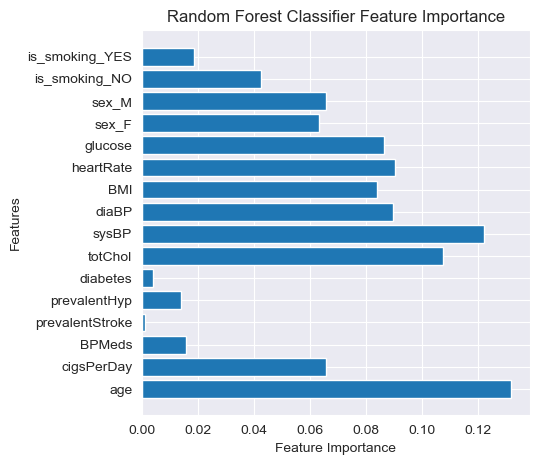

In [111]:
#plotting the feature importance
plt.figure(figsize=(5,5))
plt.barh(features, rf_classifier.feature_importances_)
plt.title("Random Forest Classifier Feature Importance")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

## For random forest we can see that age, sysBP and totChol are the top 3 most important features.

# DECISION TREE

In [77]:
#import library
from sklearn.tree import DecisionTreeClassifier

In [78]:
dt_classifier = DecisionTreeClassifier(random_state=0, min_samples_leaf=1, min_samples_split=3)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=3, random_state=0)

In [79]:
#predict on test set
y_dt_pred = dt_classifier.predict(X_test)

In [80]:

#check accuracy
dt_acc = accuracy_score(y_test,y_dt_pred)
print(f"Using Decision Tree we get an accuracy of {round(dt_acc*100,2)}%")

Using Decision Tree we get an accuracy of 81.35%


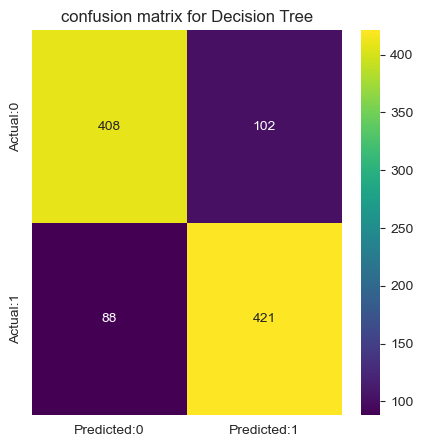

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       510
           1       0.80      0.83      0.82       509

    accuracy                           0.81      1019
   macro avg       0.81      0.81      0.81      1019
weighted avg       0.81      0.81      0.81      1019



In [110]:
#plot the confusion matrix
conf_mat = confusion_matrix(y_test,y_dt_pred)
conf_matrix=pd.DataFrame(data=conf_mat,index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='viridis')
plt.title('confusion matrix for Decision Tree')
plt.show()


#classification report
print(classification_report(y_test,y_dt_pred))

In [82]:
#check f1 score
dt_f1_score = f1_score(y_test, y_dt_pred)
print(f'The f1 score for decision tree classifier is {round(dt_f1_score*100,2)}%')

The f1 score for decision tree classifier is 81.59%


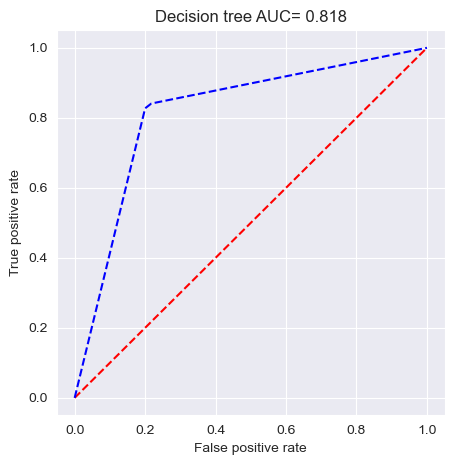

In [109]:
#predict probability of the target variable
probability = dt_classifier.predict_proba(X_test)

# keep probabilities for the positive outcome only
probability = probability[:, 1]

# calculate AUC
dt_auc = roc_auc_score(y_test, probability)

# calculate roc curve
fpr, tpr, thresh = roc_curve(y_test, probability)

# plot curve
sns.set_style('darkgrid')
plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], linestyle='--',color='red')
plt.plot(fpr, tpr,linestyle='--',color='blue')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"Decision tree AUC= {round(dt_auc,3)}")
plt.show()

# xgboost

In [84]:

#import library
from xgboost import XGBClassifier

In [85]:
#training the model after running grid search for optimal parameters
xgb_classifier = XGBClassifier(random_state=0,max_depth=7,
 max_features='auto',
 min_samples_leaf=1,
 min_samples_split=3,
 n_estimators=100)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_features='auto',
              max_leaves=None, min_child_weight=None, min_samples_leaf=1,
              min_samples_split=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, ...)

In [86]:

#predict on test set
y_xgb_pred = xgb_classifier.predict(X_test)

In [87]:
# check accuracy
xgb_acc = accuracy_score(y_test,y_xgb_pred)
print(f"Using XGB classifier we get an accuracy of {round(xgb_acc*100,2)}%")

Using XGB classifier we get an accuracy of 89.79%


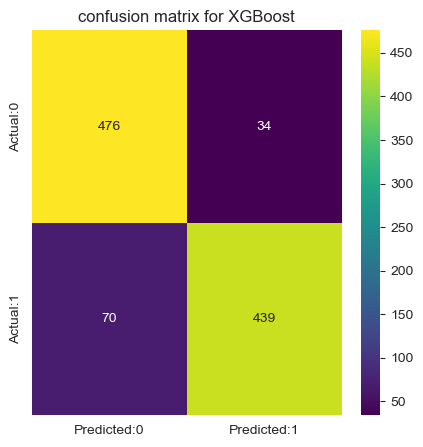

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       510
           1       0.93      0.86      0.89       509

    accuracy                           0.90      1019
   macro avg       0.90      0.90      0.90      1019
weighted avg       0.90      0.90      0.90      1019



In [108]:
#plot the confusion matrix
conf_mat = confusion_matrix(y_test,y_xgb_pred)
conf_matrix=pd.DataFrame(data=conf_mat,index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='viridis')
plt.title('confusion matrix for XGBoost')
plt.show()

#classification report
print(classification_report(y_test,y_xgb_pred))

In [89]:

#check f1 score
xgb_f1_score = f1_score(y_test, y_xgb_pred)
print(f'The f1 score for XGB classifier is {round(xgb_f1_score*100,2)}%')

The f1 score for XGB classifier is 89.41%


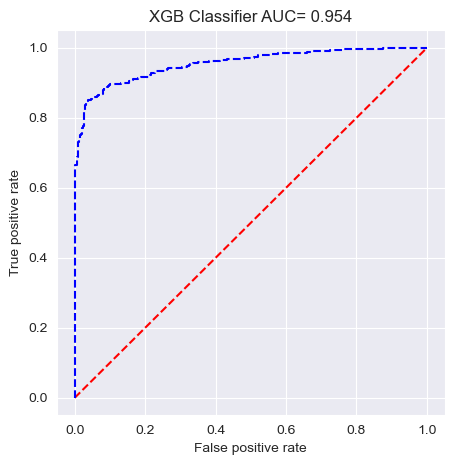

In [107]:

#predict probability for the target variable
probability = xgb_classifier.predict_proba(X_test)

# keep probabilities for the positive outcome only
probability = probability[:, 1]

# calculate AUC
xgb_auc = roc_auc_score(y_test, probability)

# calculate roc curve
fpr, tpr, thresh = roc_curve(y_test, probability)

# plot curve
sns.set_style('darkgrid')
plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], linestyle='--',color='red')
plt.plot(fpr, tpr,linestyle='--',color='blue')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"XGB Classifier AUC= {round(xgb_auc,3)}")
plt.show()

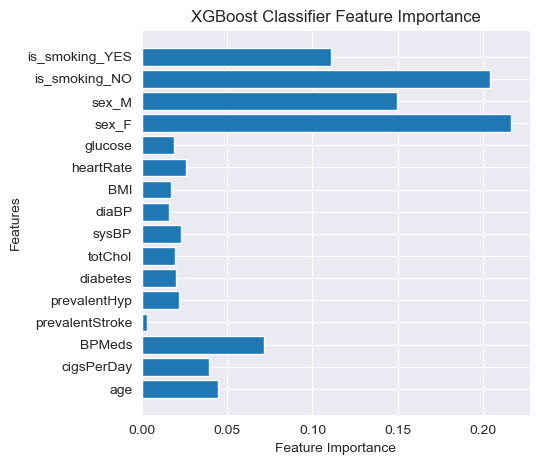

In [106]:
#plot the feature importance
plt.figure(figsize=(5,5))
plt.barh(features, xgb_classifier.feature_importances_)
plt.title("XGBoost Classifier Feature Importance")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

## For XGBoost we can see that sex_M, sex_F and is_smoking_YES are the top 3 most important features.

# SUPPORT VECTOR MACHINE

In [92]:

#import library
from sklearn.model_selection import GridSearchCV

In [93]:
from sklearn.svm import SVC
svc = SVC()

In [94]:

# running grid search for optimal parameters
param_grid = {'C': [0.1,1, 10], 
              'gamma': [1,0.1,0.01],
              'kernel': ['rbf','sigmoid'],
              'probability':[True]}
 
svm_classifier = GridSearchCV(SVC(), param_grid,cv=2)
 
# fitting the model
svm_classifier.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf', 'sigmoid'], 'probability': [True]})

In [95]:

y_svm_pred = svm_classifier.predict(X_test)

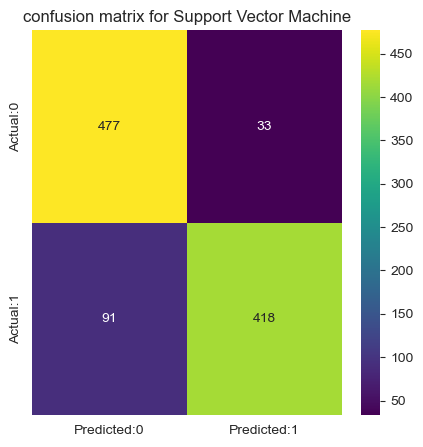

              precision    recall  f1-score   support

           0       0.84      0.94      0.88       510
           1       0.93      0.82      0.87       509

    accuracy                           0.88      1019
   macro avg       0.88      0.88      0.88      1019
weighted avg       0.88      0.88      0.88      1019



In [104]:

conf_mat = confusion_matrix(y_test,y_svm_pred)
conf_matrix=pd.DataFrame(data=conf_mat,index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='viridis')
plt.title('confusion matrix for Support Vector Machine')
plt.show()


print(classification_report(y_test,y_svm_pred))

In [97]:

#accuracy
svm_acc = accuracy_score(y_test,y_svm_pred)
print(f"Using SVM we get an accuracy of {round(svm_acc*100,2)}%")

Using SVM we get an accuracy of 87.83%


In [98]:
svm_f1_score = f1_score(y_test, y_svm_pred)
print(f'The f1 score for SVM is {round(svm_f1_score*100,2)}%')

The f1 score for SVM is 87.08%


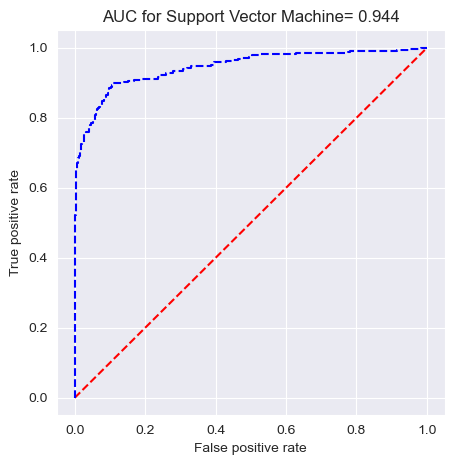

In [105]:
# ROC curve and AUC 
probability = svm_classifier.predict_proba(X_test)

# keep probabilities for the positive outcome only
probability = probability[:, 1]

# calculate AUC
svm_auc = roc_auc_score(y_test, probability)

# calculate roc curve
fpr, tpr, thresh = roc_curve(y_test, probability)

# plot curve
sns.set_style('darkgrid')
plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], linestyle='--',color='red')
plt.plot(fpr, tpr,linestyle='--',color='blue')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC for Support Vector Machine= {round(svm_auc,3)}")
plt.show()

# LOGISTIC REGRESSION

In [100]:
from sklearn.linear_model import LogisticRegression

## Before running our Logistic regression model we need to treat multicollinearity. So we'll take the help of VIF(Variance Inflation Factor).

In [101]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [102]:

df_new.head()

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,sex_F,sex_M,is_smoking_NO,is_smoking_YES,TenYearCHD
0,36,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,False,True,True,False,0
1,46,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,True,False,False,True,0
2,50,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,False,True,False,True,1
3,64,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,True,False,False,True,0
4,61,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,True,False,True,False,1


In [116]:
#check for varince inflation factor 
df_log = df_new.copy()
df_log = df_log.drop(columns=['sysBP','diaBP','BMI','age','heartRate','TenYearCHD','glucose'])


In [117]:
df_log.columns

Index(['cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',
       'totChol', 'sex_F', 'sex_M', 'is_smoking_NO', 'is_smoking_YES'],
      dtype='object')

In [118]:
features = ['cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',
       'totChol', 'sex_F', 'sex_M', 'is_smoking_NO', 'is_smoking_YES']
     

In [119]:
X = df_log[features]
y = df_new.iloc[:,-1]

In [121]:

# split the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123,stratify=y)

In [120]:
scaler = StandardScaler()

scaled_train_X = scaler.fit_transform(X_train)
X_train = pd.DataFrame(scaled_train_X)

scaled_test_X = scaler.transform(X_test)
X_test = pd.DataFrame(scaled_test_X)

In [122]:
# Use gridsearch to search optimal parameters
parameters = {'solver':['newton-cg', 'lbfgs', 'liblinear'],
          'C':[100, 10, 1.0, 0.1, 0.01],
          'penalty':['l1','l2','elasticnet'],
          'class_weight':['balanced',None]}
log_classifier = GridSearchCV(LogisticRegression(),param_grid=parameters,cv=5)

In [123]:

#train the classifier
log_classifier.fit(X_train,y_train)

#best parameters
log_classifier.best_params_

{'C': 10, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

In [124]:

#Prediction on the test set
y_log_pred = log_classifier.predict(X_test)

In [125]:
#check accuracy
log_acc = accuracy_score(y_test,y_log_pred)
print(f"Using logistic regression we get an accuracy of {round(log_acc*100,2)}%")

Using logistic regression we get an accuracy of 72.91%


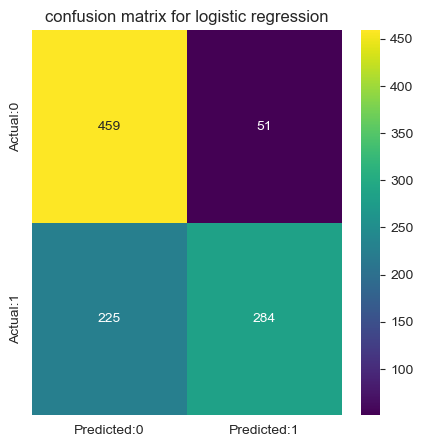

              precision    recall  f1-score   support

           0       0.67      0.90      0.77       510
           1       0.85      0.56      0.67       509

    accuracy                           0.73      1019
   macro avg       0.76      0.73      0.72      1019
weighted avg       0.76      0.73      0.72      1019



In [126]:

#plot the confusion matrix
conf_mat = confusion_matrix(y_test,y_log_pred)
conf_matrix=pd.DataFrame(data=conf_mat,index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='viridis')
plt.title('confusion matrix for logistic regression')
plt.show()

#classification report for the model
print(classification_report(y_test,y_log_pred))


In [127]:
#check f1 score 
log_f1_score = f1_score(y_test, y_log_pred)
print(f'The f1 score for logistic regression is {round(log_f1_score*100,2)}%')

The f1 score for logistic regression is 67.3%


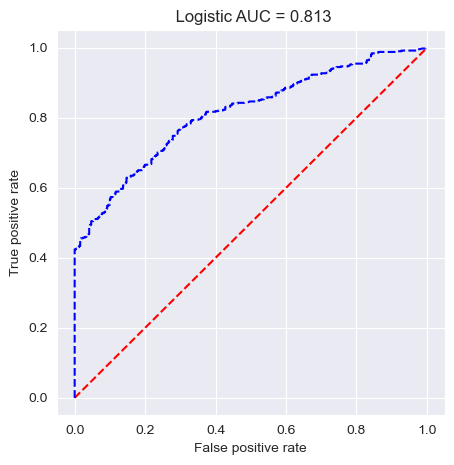

In [128]:

#predict probability of the target variable
probability = log_classifier.predict_proba(X_test)

# keep probabilities for the positive outcome only
probability = probability[:, 1]

# calculate AUC
log_auc = roc_auc_score(y_test, probability)

# calculate roc curve
fpr, tpr, thresh = roc_curve(y_test, probability)

# plot curve
sns.set_style('darkgrid')
plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], linestyle='--',color='red')
plt.plot(fpr, tpr,linestyle='--',color='blue')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f" Logistic AUC = {round(log_auc,3)}")
plt.show()

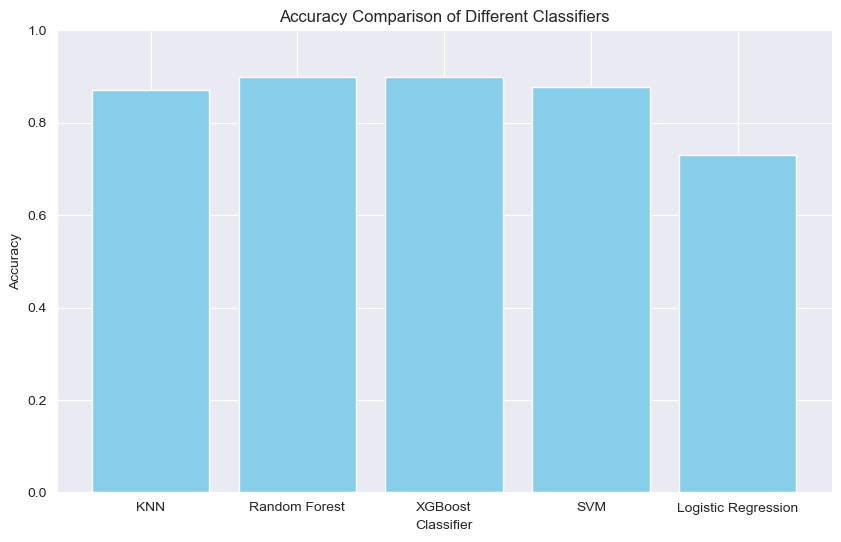

In [131]:

import matplotlib.pyplot as plt

# Define classifiers and their accuracies
classifiers = {
    "KNN":knn_acc,
    "Random Forest": rf_acc,
    "XGBoost": xgb_acc,
    "SVM": svm_acc,
    "Logistic Regression": log_acc
}

# Plot bar chart for classifier accuracies
plt.figure(figsize=(10, 6))
plt.bar(classifiers.keys(), classifiers.values(), color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Classifiers')
plt.ylim(0.0, 1.0)  # Set y-axis limits to ensure accuracy values are within range
plt.show()

Conclusion from our models
We tried to fit various models to our dataset to predict the risk of Coronary Heart Disease for next ten years.
This was a class imbalanced dataset so we used SMOTE(Synthetic minority oversampling technique) which is a class imbalance handling technique before running our algorithms.
Age, systolic blood pressure, total cholesterol and heart rate were some of the important features in the case of random forest classifier.
Sex, age and whether the person smokes or not were the important features in the case of XGBoost.
Naive Bayes classifier was not able to perform well in the prediction of target variable.
Support Vector Machine and Random Forest gave similar results and were better than the rest.
If there were more data points better models could have been built but there's always scope for improvement. In our models we could have also used Principal component analysis, some more hyperparameter tuning and various other methods.

In [6]:
random.randint(1,100 ,size=(5,5))

NameError: name 'random' is not defined

In [7]:
import numpy as np

In [8]:
np.random.randint(1,100 ,size=(5,5))

array([[28, 17, 23, 92, 83],
       [38,  9, 89, 43, 31],
       [45, 78, 21,  5,  1],
       [62, 53, 12, 68, 54],
       [58,  6,  6, 93, 41]])

AttributeError: module 'numpy' has no attribute 'arary'